In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [30]:
data = [[[i+j/100] for i in range (5)] for j in range(100)]
target = [(i+5)/100 for i in range(100)]

In [31]:
data, target

([[[0.0], [1.0], [2.0], [3.0], [4.0]],
  [[0.01], [1.01], [2.01], [3.01], [4.01]],
  [[0.02], [1.02], [2.02], [3.02], [4.02]],
  [[0.03], [1.03], [2.03], [3.03], [4.03]],
  [[0.04], [1.04], [2.04], [3.04], [4.04]],
  [[0.05], [1.05], [2.05], [3.05], [4.05]],
  [[0.06], [1.06], [2.06], [3.06], [4.06]],
  [[0.07], [1.07], [2.07], [3.07], [4.07]],
  [[0.08], [1.08], [2.08], [3.08], [4.08]],
  [[0.09], [1.09], [2.09], [3.09], [4.09]],
  [[0.1], [1.1], [2.1], [3.1], [4.1]],
  [[0.11], [1.11], [2.11], [3.11], [4.11]],
  [[0.12], [1.12], [2.12], [3.12], [4.12]],
  [[0.13], [1.13], [2.13], [3.13], [4.13]],
  [[0.14], [1.1400000000000001], [2.14], [3.14], [4.14]],
  [[0.15], [1.15], [2.15], [3.15], [4.15]],
  [[0.16], [1.16], [2.16], [3.16], [4.16]],
  [[0.17], [1.17], [2.17], [3.17], [4.17]],
  [[0.18], [1.18], [2.18], [3.18], [4.18]],
  [[0.19], [1.19], [2.19], [3.19], [4.19]],
  [[0.2], [1.2], [2.2], [3.2], [4.2]],
  [[0.21], [1.21], [2.21], [3.21], [4.21]],
  [[0.22], [1.22], [2.22], [3.22]

In [32]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=4)

In [49]:
model = Sequential()

In [50]:
model.add(LSTM((1), batch_input_shape=(None,5,1), return_sequences=True))

In [51]:
model.add(LSTM((1), return_sequences=False))

In [52]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 5, 1)              12        
_________________________________________________________________
lstm_6 (LSTM)                (None, 1)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [54]:
history=model.fit(x_train, y_train, epochs=400,validation_data=(x_test,y_test))

Epoch 1/400
3/3 [==============================] - 4s 449ms/step - loss: 0.5700 - accuracy: 0.0000e+00 - val_loss: 0.4587 - val_accuracy: 0.0000e+00
Epoch 2/400
3/3 [==============================] - 0s 23ms/step - loss: 0.5674 - accuracy: 0.0000e+00 - val_loss: 0.4561 - val_accuracy: 0.0000e+00
Epoch 3/400
3/3 [==============================] - 0s 23ms/step - loss: 0.5648 - accuracy: 0.0000e+00 - val_loss: 0.4535 - val_accuracy: 0.0000e+00
Epoch 4/400
3/3 [==============================] - 0s 25ms/step - loss: 0.5623 - accuracy: 0.0000e+00 - val_loss: 0.4509 - val_accuracy: 0.0000e+00
Epoch 5/400
3/3 [==============================] - 0s 26ms/step - loss: 0.5596 - accuracy: 0.0000e+00 - val_loss: 0.4483 - val_accuracy: 0.0000e+00
Epoch 6/400
3/3 [==============================] - 0s 23ms/step - loss: 0.5570 - accuracy: 0.0000e+00 - val_loss: 0.4456 - val_accuracy: 0.0000e+00
Epoch 7/400
3/3 [==============================] - 0s 23ms/step - loss: 0.5543 - accuracy: 0.0000e+00 - val_los

In [55]:
results = model.predict(x_test)

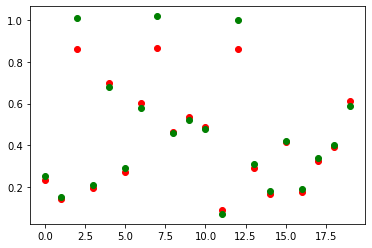

In [56]:
plt.scatter(range(20),results,c='r')
plt.scatter(range(20),y_test,c='g')
plt.show()